# 050. Spam Filtering Logistic Regression

- https://www.kaggle.com/uciml/sms-spam-collection-dataset  

- SMS 스팸 컬렉션은 태그가 지정된 SMS 메시지 집합입니다. 여기에는 5,574 개 메시지 중 영어로 된 SMS 메시지 한 세트가 포함되어 있으며 이에 따라 햄 (합법적) 또는 스팸으로 태그가 지정됩니다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sms = pd.read_csv("security_data/spam.csv", encoding="ISO-8859-1", 
                  usecols=[0, 1], skiprows=1, 
                  names=["label", "message"])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms['label'].unique()

array(['ham', 'spam'], dtype=object)

In [5]:
sms.label = sms.label.map({"ham": 0, "spam": 1})

In [6]:
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

### Train / Test split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
            train_test_split(sms.message, sms.label, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

### Create Document Train Matrix

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

couvec = CountVectorizer()
couvec

CountVectorizer()

### Tokenized Train document matrix  생성

In [9]:
X_train_tokenized = couvec.fit_transform(X_train)
X_train_tokenized

<4457x7763 sparse matrix of type '<class 'numpy.int64'>'
	with 59425 stored elements in Compressed Sparse Row format>

In [33]:
#A list of feature names.
names = couvec.get_feature_names()
print(len(names))
# print(names)

7763


In [34]:
# Document-term matrix 출력
# (document no., feature no)
# print(X_train_tokenized)

In [35]:
X_test_tokenized = couvec.transform(X_test)
X_test_tokenized

<1115x7763 sparse matrix of type '<class 'numpy.int64'>'
	with 14935 stored elements in Compressed Sparse Row format>

In [36]:
lr_classifier = LogisticRegression(solver='lbfgs', random_state=0)
lr_classifier.fit(X_train_tokenized, y_train)

LogisticRegression(random_state=0)

### predict

- predict() - 예측된 class 를 threshold 0.5 기준으로 반환
- predict_proba() - class 별 probability 를 반환

In [37]:
y_pred = lr_classifier.predict(X_test_tokenized)

print(y_pred)
print()
print("Test set 의 true counts = ", sum(y_test))
print("모델이 예측한 predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0 0 0 ... 0 0 0]

Test set 의 true counts =  158
모델이 예측한 predicted true counts =  44
accuracy = 0.83


## confusion matrix 를 이용한 model 평가

In [38]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns

confution matrix
 [[  9 149]
 [ 35 922]]


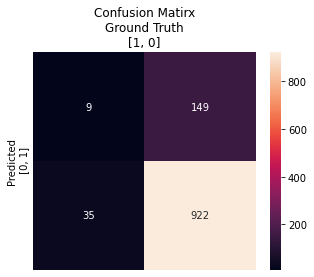

In [39]:
cm  = confusion_matrix(y_test, y_pred, labels=[1, 0])

print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=False, yticklabels=False)
ax.set_ylabel('Predicted\n [0, 1]')
ax.set_title('Confusion Matirx\nGround Truth\n[1, 0]')
None

In [40]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred, labels=[1, 0])))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred, labels=[1, 0])))
print("f1 score\n", f1_score(y_test, y_pred))

Accuracy: 0.83
Precision: 0.20
Recall: 0.06
f1 score
 0.0891089108910891


# 실습 

## Fraud Payment Logistic Regression

- accountAgeDays : 계정이 생성된 기간 (일)
- numItems : 구매한 항목 수
- localTime : 결제가 이루어진 시기 (부동 숫자로 변환 됨)
- paymentMethod : 결제 방법 (페이팔, 상점 신용 카드 또는 신용 카드)
- paymentMethodAgeDays : 결제가 완료된 기간 (일)
- label 0 - 정상, 1 - fraud

In [41]:
df = pd.read_csv("security_data/payment_fraud.csv")
df.sample(5)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
38332,116,1,4.505662,creditcard,0.000000,0
3996,562,1,5.017904,creditcard,0.000694,0
22176,1403,1,5.034622,creditcard,0.000694,0
9697,2000,1,4.965339,creditcard,6.822917,0
9032,2000,1,4.962055,paypal,400.675000,0


In [42]:
df['label'].value_counts()

0    38661
1      560
Name: label, dtype: int64

In [43]:
df['paymentMethod'].value_counts()

creditcard     28004
paypal          9303
storecredit     1914
Name: paymentMethod, dtype: int64

In [44]:
df = pd.get_dummies(df, columns=['paymentMethod'])
df.sample(5)

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
23123,623,1,4.524580,0.011806,0,1,0,0
32085,874,1,4.748314,304.950000,0,1,0,0
9859,51,1,4.886641,0.000000,0,1,0,0
37939,1105,1,4.748314,233.926389,0,1,0,0
22767,181,1,2.948940,180.636111,0,1,0,0


### Train / Test split

In [45]:
# your code here

### Model 생성

In [27]:
# your code here

### predict

- predict() - 예측된 class 를 threshold 0.5 기준으로 반환
- predict_proba() - class 별 probability 를 반환

In [28]:
# your code here

## confusion matrix 를 이용한 model 평가

In [29]:
# your code here